### Data Visualization

Jay Urbain, PhD

6/9/2018, 9/16/2018, 9/18/2018

Topics:  
- Data Visualization  
- Introduction to Matplotlib  
- Line Plot  
- Bar Chart  
- Histogram Plot  
- Box and Whisker Plot  
- Scatter Plot  

References:  
https://matplotlib.org/users/index.html   
Python Data Science Handbook, Jake VanderPlas, 2017.    
The Visual Display of Quantitative Information, 2001.  
Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython, 2017.
Applied Multivariate Statistical Analysis, 2015.  


Data visualization is an important skill in applied statistics, data science, and machine learning.

Statistics focuses on quantitative descriptions and estimations of data. Data visualization provides tools for gaining a qualitative understanding of these descriptions.

Visually exploring and getting to know a dataset and can help with identifying patterns, corrupt data, and outliers, and better understand relationships in the data. 

Data visualizations can be used to express and demonstrate key relationships in plots and charts that are more intuitive to data scientists and stakeholders than raw measures of association or significance.

Data visualization and exploratory data analysis are large fields themselves and this tutorial will just provide an introduction.

There are five key plots for basic data visualization:

- Line Plot  
- Bar Chart  
- Histogram Plot  
- Box and Whisker Plot  
- Scatter Plot  


#### Matplotlib

There are several excellent plotting libraries in Python.

For quick and exploratory plots intended for your initial EDA, start with the matplotlib library. It is the foundation for many other plotting libraries and plotting support in higher-level libraries such as Pandas.

Recent Matplotlib versions make it relatively easy to set new global plotting styles (customizing Style Sheets), and people have been developing new packages that build on its powerful internals to drive Matplotlib via cleaner, more modern APIs. For example, Seaborn, ggpy, HoloViews, Altair, and even Pandas can be used as wrappers around Matplotlib's API. 

The matplotlib provides a context, one in which one or more plots can be drawn before the image is shown or saved to file. The context can be accessed via functions on pyplot. By convention, the context can be imported as follows:


In [24]:
import matplotlib as mpl 
import matplotlib.pyplot as plt # plt interface is what's usually needed

#### Setting Styles

Use the ``plt.style`` directive to choose appropriate aesthetic styles for our figures. 

https://matplotlib.org/api/style_api.html   


In [28]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

This site provides a nice illustration of the different styles:  
https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html    

Here we will set the ``classic`` style, which ensures that the plots we create use the classic Matplotlib style. Please feel free to experiment.

In [31]:
plt.style.use('classic')

#### Plotting from an IPython shell

It can be convenient to use Matplotlib interactively within an IPython shell.
IPython is built to work well with Matplotlib if you specify Matplotlib mode.
To enable this mode, you can use the ``%matplotlib`` magic command after starting ``ipython``:

```ipython
In [1]: %matplotlib
Using matplotlib backend: TkAgg

In [2]: import matplotlib.pyplot as plt
```

At this point, any ``plt`` plot command will cause a figure window to open, and further commands can be run to update the plot.
Some changes (such as modifying properties of lines that are already drawn) will not draw automatically: to force an update, use ``plt.draw()``.
Using ``plt.show()`` in Matplotlib mode is not required.

#### Plotting from an Jupyter notebook

The Jupyter notebook is a browser-based interactive data analysis tool that can combine narrative, code, graphics, HTML elements, and more into a single executable document.

Plotting interactively within an notebook can be done with the ``%matplotlib`` magic command, and works in a similar way to the IPython shell.
In the Jupyter notebook, you also have the option of embedding graphics directly in the notebook, with two possible options:

- ``%matplotlib notebook`` will lead to *interactive* plots embedded within the notebook
- ``%matplotlib inline`` will lead to *static* images of your plot embedded in the notebook

Generally opt for ``%matplotlib inline``:

In [32]:
%matplotlib inline

After running this command (it needs to be done only once per kernel/session), any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic:

In [34]:
plt.plot?

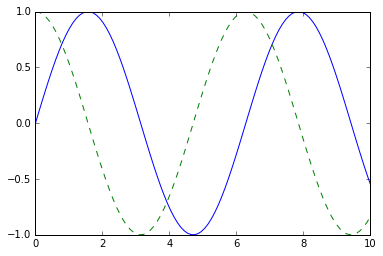

In [79]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-', label="sin")
plt.plot(x, np.cos(x), '--', label="cos");
plt.show()

Note that when saving your figure, it's not necessary to use ``plt.show()`` or related commands discussed earlier.

#### Saving Figures to File

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats.
Saving a figure can be done using the ``savefig()`` command.
For example, to save the previous figure as a PNG file, you can run this:

In [47]:
fig.savefig('my_figure.png')

We now have a file called ``my_figure.png`` in the current working directory:

In [48]:
!ls -lh my_figure.png

-rw-r--r--@ 1 jayurbain  staff    26K Sep 18 05:00 my_figure.png


To confirm that it contains what we think it contains, let's use the IPython ``Image`` object to display the contents of this file:

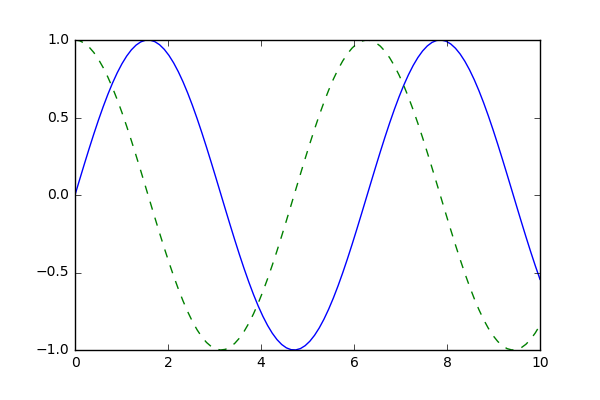

In [49]:
from IPython.display import Image
Image('my_figure.png')

In ``savefig()``, the file format is inferred from the extension of the given filename.
Depending on what backends you have installed, many different file formats are available.
The list of supported file types can be found for your system by using the following method of the figure canvas object:


In [50]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpeg': 'Joint Photographic Experts Group',
 'jpg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

####  Interfaces 
A confusing feature of Matplotlib is its dual interfaces:   
- a convenient MATLAB-style state-based interface, and   
- a more powerful object-oriented interface. 
    
**MATLAB-style Interface**

Matplotlib was originally written as a Python alternative for MATLAB users, and much of its syntax reflects that fact.
The MATLAB-style tools are contained in the pyplot (``plt``) interface.
For example:

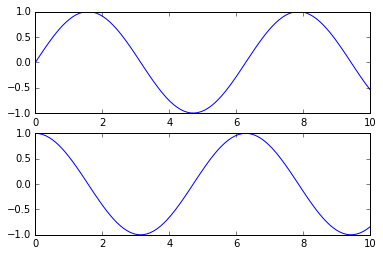

In [51]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

This interface is *stateful*: it keeps track of the "current" figure and axes, which are where all ``plt`` commands are applied.

You can get a reference to these using the ``plt.gcf()`` (get current figure) and ``plt.gca()`` (get current axes) routines.

While this stateful interface is fast and convenient for simple plots, it is easy to run into problems.
For example, once the second panel is created, how can we go back and add something to the first?
This is possible within the MATLAB-style interface, but there is a better way.

#### Object-oriented interface

The object-oriented interface is available for these more complicated situations, and for when you want more control over your figure.
Rather than depending on some notion of an "active" figure or axes, in the object-oriented interface the plotting functions are *methods* of explicit ``Figure`` and ``Axes`` objects.
To re-create the previous plot using this style of plotting, you might do the following:

Charts and plots are made by making and calling the context:

Drawings on the context can be shown in a new window by calling the `show()` function:


Alternately, the drawings on the context can be saved to file using the `savefig()` function.

#### Line Plot

A line plot is generally used to present observations collected at regular intervals.

The `x-axis` represents the regular interval, such as time. The `y-axis` shows the observations, ordered by the x-axis and connected by a line.

A line plot can be created by calling the plot() function and passing the `x-axis` data for the regular interval, and `y-axis` for the observations.


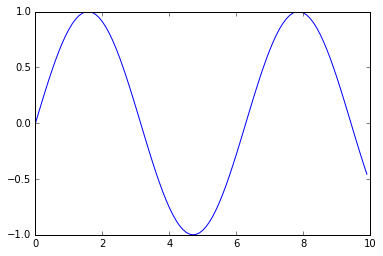

In [53]:
# ipython magic command to plot inline
%matplotlib inline 

from numpy import sin
from matplotlib import pyplot as plt

# generate consistent interval for x-axis
x = [x*0.1 for x in range(100)]

# apply function of x to generate y-axis data
y = sin(x)

# create line plot
plt.plot(x, y)

# show line plot
#plt.show() # not needed for notebook


#### Bar Chart

A bar chart is generally used to present relative quantities for multiple categories.

The `x-axis` represents the categories and are spaced evenly. The y-axis represents the quantity for each category and is drawn as a bar from the baseline to the appropriate level on the y-axis.

A bar chart can be created by calling the `bar()` function and passing the category names for the x-axis and the quantities for the y-axis.

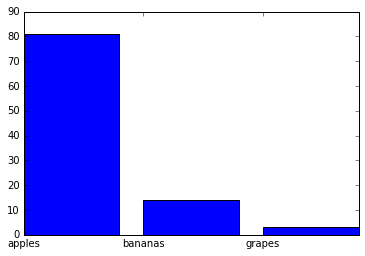

In [54]:
# example of a bar chart
from random import seed
from random import randint
from matplotlib import pyplot as plt

# seed the random number generator
seed(42)

# names for categories
x = ['apples', 'bananas', 'grapes']

# quantities for each category
y = [randint(0, 100), randint(0, 100), randint(0, 100)]

# create bar chart
plt.bar(x, y)

# show line plot
plt.show()

#### Histogram Plot

A histogram plot is used to summarize the distribution of a data sample.

The `x-axis` represents discrete bins or intervals for the observations. 
For example, observations with values between 1 and 10 may be split into five bins, the values $[1,2]$ would be allocated to the first bin, $[3,4]$ would be allocated to the second bin, and so on.

The `y-axis` represents the frequency or count of the number of observations in the dataset that belong to each bin.

Essentially, a data sample is transformed into a bar chart where each category on the `x-axis` represents an interval of observation values.

A histogram plot can be created by calling the hist() function and passing in a list or array that represents the data sample.

The example below creates a dataset of 1,000 random numbers drawn from a standard Gaussian distribution, then plots the dataset as a histogram.

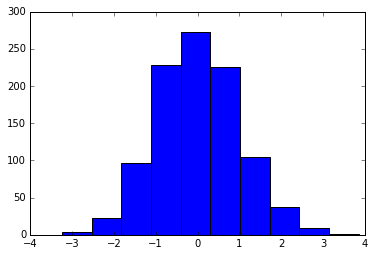

In [55]:
# example of a histogram plot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot as plt

# seed the random number generator
seed(42)

# random numbers drawn from a Gaussian distribution
x = randn(1000)

# create histogram plot
plt.hist(x)

# show line plot
plt.show()

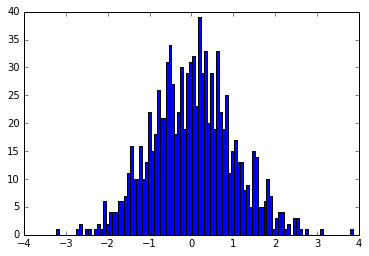

In [56]:
# controlling the number of bins in a historgram
# create histogram plot
plt.hist(x, bins=100)
plt.show()

#### Box (and Whisker) Plot

A box and whisker plot, or boxplot for short, is used to summarize the distribution of a data sample.

The `x-axis` is used to represent the data sample, where multiple boxplots can be drawn side by side on the x-axis if desired.

The `y-axis` represents the observation values. A box is drawn to summarize the middle $50%$ of the dataset starting at the observation at the $25th$ percentile and ending at the $75th$ percentile. The median, or `50th percentile`, is drawn with a line. A value called the *interquartile range*, or IQR, is calculated as *1.5 * the difference between the 75th and 25th percentiles. Lines called whiskers are drawn extending from both ends of the box with the length of the IQR to demonstrate the expected range of sensible values in the distribution. Observations outside the whiskers might be outliers and are drawn with small circles.

Boxplots can be drawn by calling the boxplot() function passing in the data sample as an array or list.

Boxplots are useful to summarize the distribution of a data sample as an alternative to the histogram. 

They can help to quickly get an idea of the range of common and sensible values in the box and in the whisker respectively. Because we are not looking at the shape of the distribution explicitly, this method is often used when the data has an unknown or unusual distribution, such as data  that is non-Gaussian.

The example below creates three boxplots in one chart, each summarizing a data sample drawn from a slightly different Gaussian distribution. Each data sample is created as an array and all three data sample arrays are added to a list that is padded to the plotting function.

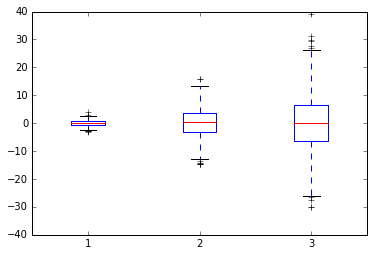

In [57]:
# example of a box and whisker plot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot as plt

# seed the random number generator
seed(42)

# random numbers drawn from a Gaussian distribution
x = [randn(1000), 5 * randn(1000), 10 * randn(1000)]

# create box and whisker plot
plt.boxplot(x)

# show box plot
plt.show()

#### Scatter Plot

A scatter plot is used to summarize the relationship between two paired data samples.

Paired data samples means that two measures were recorded for a given observation, such as the weight and height of a person.

The `x-axis` represents observation values for the first sample, and the `y-axis` represents the observation values for the second sample. Each point on the plot represents a single observation.

Scatterplots are basically bivariate or trivariate plots of variables against each other. They help us understand relationships among the variables of a dataset. A downward-sloping scatter indicates that as we increase the variable on the horizontal axis, the variable on the vertical axis decreases.

Scatter plots can be created by calling the scatter() function and passing the two data sample arrays.

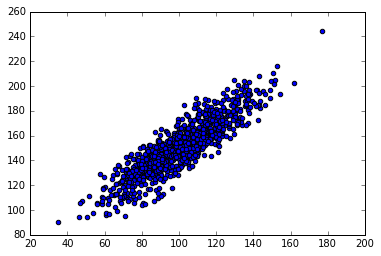

In [58]:
# example of a scatter plot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot as plt

# seed the random number generator
seed(42)

# first variable
x = 20 * randn(1000) + 100

# second variable
y = x + (10 * randn(1000) + 50)

# create scatter plot
plt.scatter(x, y)

# show line plot
plt.show()

Adding a regression line.

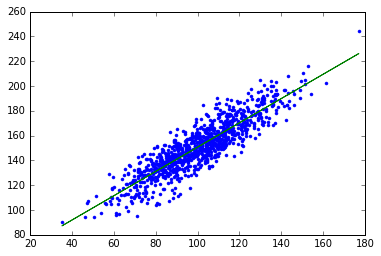

In [60]:
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

# Sample data
# x = np.arange(10)
# y = 5 * x + 10

# Fit with polyfit
b, m = polyfit(x, y, 1)

plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.show()

In [61]:
polyfit?

#### Pandas

Univariate historgrams.

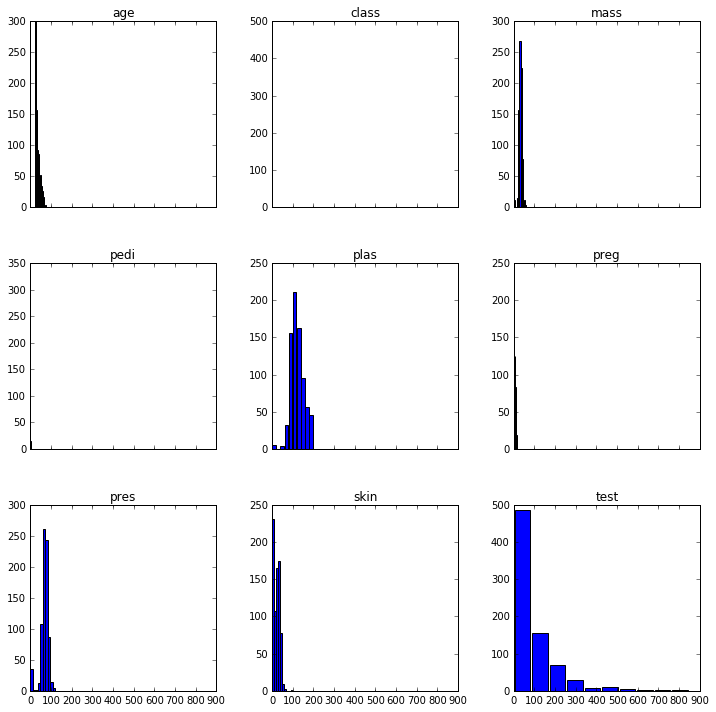

In [74]:
# Univariate Histograms
import matplotlib.pyplot as plt
import pandas

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pandas.read_csv('data/pima-indians-diabetes.data.csv', names=names)
ax = data.hist(bins=10, grid=False, figsize=(12,12), layout=(3,3), sharex=True, rwidth=0.9)
plt.show()